In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
time_complexity = {
    6063: {
        "AHC": 6.796682521000548,
        "DBSCAN": 0.5228887879984541
    },
    17460: {
        "AHC": 58.75219423899944,
        "DBSCAN": 4.153986843000894
    },
    24234: {
        "AHC": 114.60707034000006,
        "DBSCAN": 7.557426690000284
    },
    41694:
    {
        "AHC": np.NaN,
        "DBSCAN": 22.48284069700003
    },
}

In [5]:
# convert to dataframe
time_complexity_df = pd.DataFrame(time_complexity).T

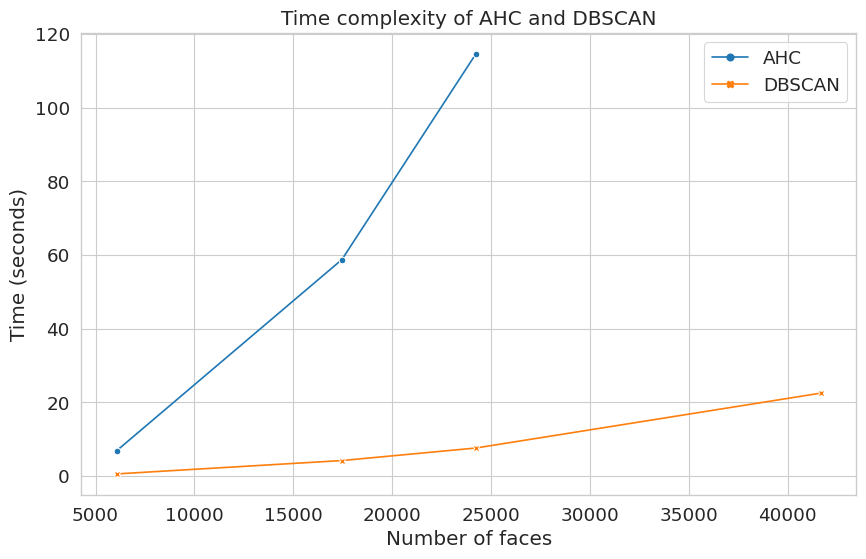

In [13]:
# plot with sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=time_complexity_df, ax=ax, dashes=False, markers=True)
ax.set_xlabel("Number of faces")
ax.set_ylabel("Time (seconds)")
ax.set_title("Time complexity of AHC and DBSCAN")
plt.show()


# Time measurements for DBSCAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ast import literal_eval
import json
import pathlib
from time import perf_counter

In [2]:
base_path = pathlib.Path("/media/bao/t7/la_lib_dataset")
# base_path = pathlib.Path("dataset")

src_folder = base_path / "img"
dst_folder = base_path / "faces"
save_folder = base_path / "time_complexity"

df_folder = save_folder / "df"
log_folder = save_folder / "log"

df_folder.mkdir(exist_ok=True, parents=True)
log_folder.mkdir(exist_ok=True, parents=True)

In [7]:
from face_clustering_pipeline import FaceClusteringPipeline

faceClusteringPipeline = FaceClusteringPipeline(src_folder, dst_folder, df_folder, log_folder)

In [3]:
model_name = "Facenet512"

# load the embeddings 
df = pd.read_csv('/media/bao/t7/la_lib_dataset/160k/df/keep_representation_Facenet512.csv', usecols=['image', f"{model_name}_representation"] ,converters={f"{model_name}_representation": json.loads})

In [4]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153019 entries, 0 to 153018
Data columns (total 2 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   image                      153019 non-null  object
 1   Facenet512_representation  153019 non-null  object
dtypes: object(2)
memory usage: 626.6 MB


In [9]:
# shuffle the dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
res = {}

for n in range(10_000, 160_001, 10_000):

    if n > len(df):
        n = len(df)

    print(f"Number of faces: {n}", end=" ")
    df_input = df.sample(n=n, random_state=42)
    t0 = perf_counter()
    df_res = faceClusteringPipeline.p_cluster_faces(df_input, df_folder, model_name=model_name, clustering_algo="DBSCAN", distance_metric="cosine", min_samples=5, threshold=0.24, save=False)
    t1 = perf_counter()
    print(f"Time: {t1-t0:.2f} seconds")
    res[n] = t1-t0

Number of faces: 10000 Time: 2.02 seconds
Number of faces: 20000 Time: 5.30 seconds
Number of faces: 30000 Time: 11.46 seconds
Number of faces: 40000 Time: 20.19 seconds
Number of faces: 50000 Time: 33.92 seconds
Number of faces: 60000 Time: 49.10 seconds
Number of faces: 70000 Time: 66.37 seconds
Number of faces: 80000 Time: 87.71 seconds
Number of faces: 90000 Time: 108.41 seconds
Number of faces: 100000 Time: 141.70 seconds
Number of faces: 110000 Time: 165.64 seconds
Number of faces: 120000 Time: 198.87 seconds
Number of faces: 130000 Time: 238.09 seconds
Number of faces: 140000 Time: 274.50 seconds
Number of faces: 150000 Time: 313.60 seconds
Number of faces: 153019 Time: 325.35 seconds


In [11]:
# load res to dataframe
# df_res = pd.DataFrame(res, index=["DBSCAN"]).T
df_res = df_res.reset_index().rename(columns={"index": "n_faces"})

In [13]:
df_res

,DBSCAN
10000,2.021078
20000,5.296272
30000,11.459426
40000,20.191853
50000,33.922965
60000,49.097190
70000,66.369667
80000,87.709108
90000,108.414976
100000,141.700313


In [34]:
# save df_res to csv
# df_res.to_csv("time_complexity_dbscan.csv")

In [2]:
df_res = pd.read_csv("time_complexity_dbscan.csv", index_col=0)

Text(0.5, 1.0, 'Time measurement for DBSCAN')

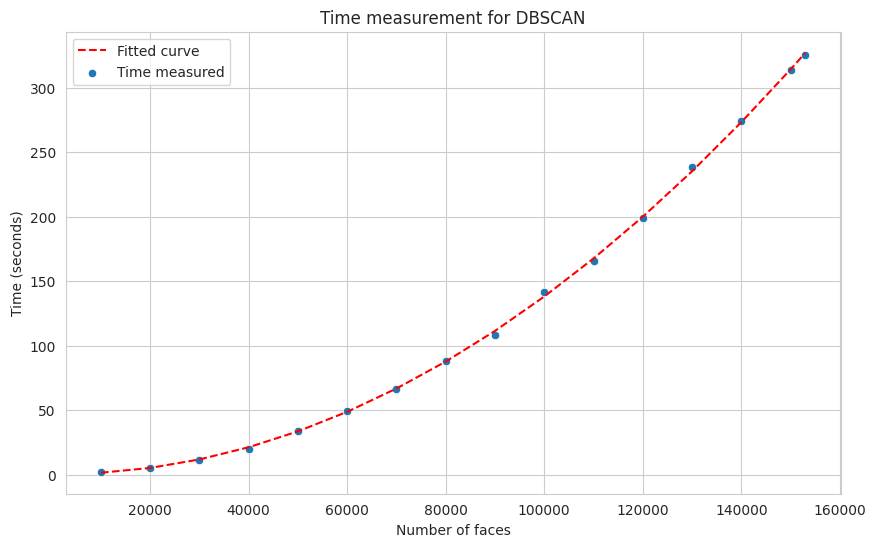

In [3]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
# sns.lineplot(data=df_res, ax=ax, x=df_res.index, y="DBSCAN", dashes=False, markers=True, label="Time measured")

# https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python

x = df_res.index
y = df_res["DBSCAN"]
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
sns.lineplot(x=x, y=p(x), ax=ax, color="red", label="Fitted curve", dashes=True, alpha=1, linestyle="dashed")

sns.scatterplot(data=df_res, ax=ax, x=df_res.index, y="DBSCAN", label="Time measured")

# x label: number of faces
ax.set_xlabel("Number of faces")
# y label: time (seconds)
ax.set_ylabel("Time (seconds)")
# title: time complexity of DBSCAN
ax.set_title("Time measurement for DBSCAN")

# plt.show()

In [4]:
# estimate the time for <n> faces
n = 843750
t = p(n)
print(f"Estimated time for {n} faces: {t:.2f} seconds = {t/60:.2f} minutes = {t/3600:.2f} hours = {t/3600/24:.2f} days = {t/3600/24/365:.2f} years")

Estimated time for 843750 faces: 10147.36 seconds = 169.12 minutes = 2.82 hours = 0.12 days = 0.00 years


Text(0.5, 1.0, 'Time estimate for DBSCAN')

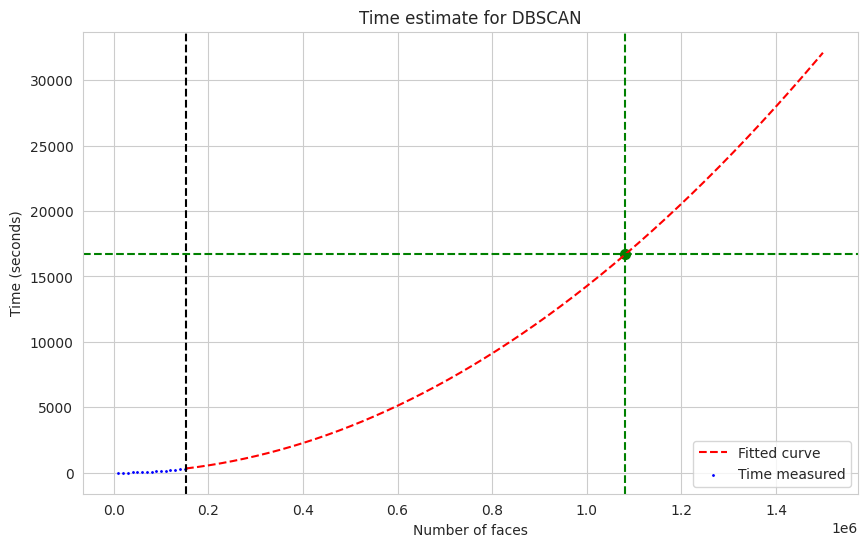

In [31]:
# plot the fitted curve for x in range 0 to 1M 

fig, ax = plt.subplots(figsize=(10, 6))

max_n_faces = len(df)

x = np.arange(max_n_faces, 1_500_001, 1000)
y = p(x)
# convert to minutes
# y = y / 60
sns.lineplot(x=x, y=y, color="red", label="Fitted curve", dashes=True, alpha=1, ax=ax, linestyle="dashed")

# plot in blue the time measured
sns.scatterplot(data=df_res, ax=ax, x=df_res.index, y="DBSCAN", label="Time measured", color="blue", s=5)

# make a vertical line at max number of faces in the dataset
ax.axvline(x=max_n_faces, color="black", linestyle="--", label="Max number of faces in the dataset")

# hightlight the point x = 1_081_180
# use a cross to mark the point
ax.scatter(x=1_081_180, y=p(1_081_180), color="green", s=50, label="Estimated time for 1M faces", marker="o")
# drawn a line from the point to the x axis
ax.axhline(y=p(1_081_180), color="green", linestyle="--")
# drawn a line from the point to the y axis
ax.axvline(x=1_081_180, color="green", linestyle="--")

# x label: number of faces
ax.set_xlabel("Number of faces")
# y label: time (seconds)
ax.set_ylabel("Time (seconds)")
# title
ax.set_title("Time estimate for DBSCAN")

In [ ]:
159_109 
623_138
153_019

In [20]:
153_019 / 623_138

0.24556197824558926

In [21]:
1_124_210 # total image in archive system
1_124_210  * 3.916422075432565 # 4.4 billion
4_402_880.861422044 * 0.24556197824558926

1081180.1343104413